<p style="text-align:center; text-decoration:underline; font-size:28px; font-weight:600;">
    Employee Attrition Analysis
</p>

<p style="text-align:center; color:#555; font-size:18px; margin-top:-10px;">
    Understanding Why Employees Leave
</p>




# Table of Contents
<ol style="line-height:1.8; font-size:16px;">
    <li>Introduction</li>
    <li>Loading Libraries</li>
    <li>Dataset Overview</li>
    <li>Data Visualization
        <ul style="margin-top:8px; margin-bottom:8px;">
            <li>Attrition Overview</li>
            <li>Demographic Factors</li>
            <li>Work & Life Balance Factors</li>
            <li>Compensation & Reward Factors</li>
            <li>Career Growth & Tenure Factors</li>
            <li>Departmental & Role-Based Factors</li>
        </ul>
    </li>
    <li>Conclusion</li>
</ol>

# 1. Introduction

<p style="text-align: justify;">Employee attrition affects the stability, productivity, and long-term performance of an organization. Understanding why employees leave helps identify structural gaps in workload, compensation, career growth, satisfaction, and role expectations.
This notebook analyzes the <span style="font-style: italic;">IBM HR Analytics Employee Attrition & Performance</span> dataset to uncover the patterns behind turnover using a structured and business-oriented exploratory approach.</p>

<p style="text-align: justify;">The analysis examines attrition across several dimensions, including work-life balance, demographic characteristics, compensation levels, tenure progression, and job-level factors. Each section focuses on identifying which groups experience higher attrition and what underlying conditions might contribute to it.</p>

<p style="text-align: justify;">The goal of this notebook is to translate raw HR data into clear insights. Instead of relying on isolated observations, the analysis follows a theme-based structure that highlights meaningful relationships—showing how work conditions, pay structure, satisfaction scores, and career timelines connect to employee exit behavior. This approach helps build a solid understanding of the factors influencing attrition and sets the foundation for targeted retention strategies or future predictive modelling.</p>

<p style="text-align: justify;">Overall, the notebook aims to present a clean analytical workflow: clear segmentation, intuitive visualizations, percentage-based comparisons, and interpretations that connect directly to real business problems.</p>

# 2. Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. Dataset Overview

<p style="text-align: justify;">This section loads the dataset and performs initial structural checks to understand the shape, data types, and basic statistical properties of the IBM HR Attrition dataset. These steps help confirm data quality before running detailed analysis.</p>

<h2>3.1 Loading Dataset</h2>

In [2]:
dataset = pd.read_csv('raw_hrdata.csv')

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<h2>3.2 Checking Dataset Structure</h2>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<h2>3.3 Checking for Missing Values</h2>

In [5]:
dataset.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h2>3.4 Basic Statistical Summary (All Numerical Columns)</h2>

In [6]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<h2>3.5 Focused Statistical Summary (Selected Numerical Variables)</h2>

In [7]:
dataset[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'
]].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


<h2>3.6 Summary</h2>
<p>These initial checks ensure the dataset is clean, complete, and ready for exploratory analysis. With no missing values and clear data types, the notebook can proceed to structured EDA without preprocessing challenges.</p>

# 4. Data Visualization
<p>This section explores employee attrition using a theme-based visualization approach. Each group of variables is analyzed to understand how different factors relate to employees leaving the organization. Visual analysis helps identify meaningful patterns and potential drivers behind attrition.</p>

## 4.1 Attrition Overview
This subsection provides a simple overview of the target variable — Attrition.
Understanding how many employees leave versus stay establishes the baseline before exploring deeper factors.

Visualizing this distribution highlights whether attrition is balanced or heavily skewed, which influences how comparisons should be interpreted later.

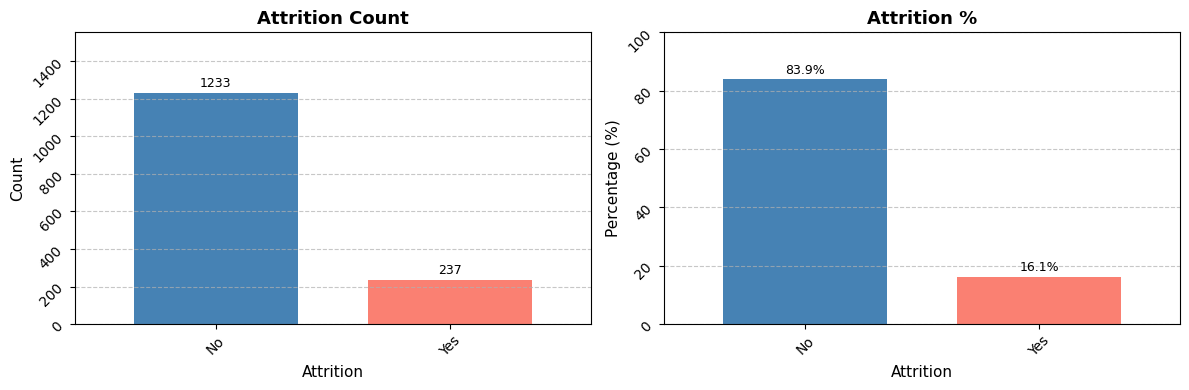

In [8]:
attrition = dataset['Attrition'].value_counts()
attrition_percentage = dataset['Attrition'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

attrition.plot(kind='bar', ax=axes[0], color=['steelblue', 'salmon'], width=0.7)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)
axes[0].set_title('Attrition Count', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_ylim(0, axes[0].get_ylim()[1] * 1.2)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=45)

attrition_percentage.plot(kind='bar', ax=axes[1], color=['steelblue', 'salmon'], width=0.7)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
axes[1].set_title('Attrition %', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Attrition', fontsize=11)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_ylim(0, 100)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

**Observation**
* The dataset contains **1,470 employees**, out of which **237 employees left** and **1,233 stayed**.
* This gives an overall **attrition rate of ~16.1%**, meaning roughly **1 in every 6 employees** leaves the company.
* The company operates with a **moderately high turnover**, signaling potential issues in job roles, work-life balance, compensation, or career progression that will be explored in later sections.

## 4.2 Demographic Factors
Demographic factors reveal who is more likely to leave — based on characteristics like age, gender, marital status, education, and education field. These attributes help identify turnover patterns that are not directly related to job roles, compensation, or performance but may reflect lifestyle stages or career goals.

Variable includes:
* Age
* Gender
* MaritalStatus
* Education
* EducationField

The goal is to understand whether attrition is concentrated in certain demographic groups or spread evenly across the workforce.

<h3 style="color:#444;">Attrition by Age</h3>

In [9]:
mean_age_by_attrition = dataset.groupby('Attrition')['Age'].mean()

age_attrition_yes = dataset.loc[dataset['Attrition'] == 'Yes', 'Age']
mean_age_attrition_yes = age_attrition_yes.mean()
age_attrition_no  = dataset.loc[dataset['Attrition'] == 'No',  'Age']
mean_age_attrition_no = age_attrition_no.mean()

age_stats = dataset.groupby('Attrition')['Age'].agg(['mean', 'median'])
age_stats

,mean,median
Attrition,,
No,37.561233,36.0
Yes,33.607595,32.0


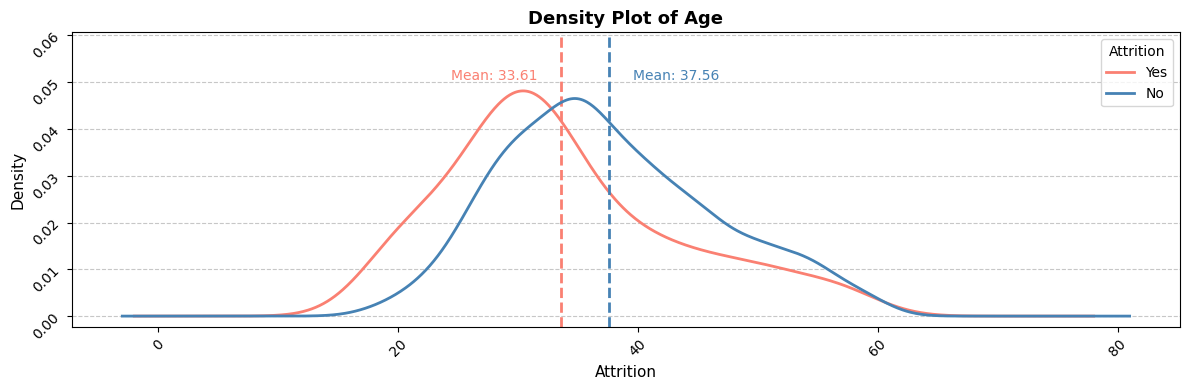

In [10]:
fig, axes = plt.subplots(figsize=(12, 4), sharey=False)

age_attrition_yes.plot(kind='kde', ax=axes, color='salmon', linewidth=2, label='Yes')
axes.axvline(mean_age_attrition_yes, color='salmon', linestyle='--', linewidth=2)
axes.text(mean_age_attrition_yes - 2, plt.ylim()[1], f'Mean: {mean_age_attrition_yes:.02f}',color='salmon', ha='right')

age_attrition_no.plot(kind='kde', ax=axes, color='steelblue', linewidth=2, label='No')
axes.axvline(mean_age_attrition_no, color='steelblue', linestyle='--', linewidth=2)
axes.text(mean_age_attrition_no + 2, plt.ylim()[1], f'Mean: {mean_age_attrition_no:.02f}',color='steelblue')

axes.set_title('Density Plot of Age', fontsize=13, fontweight='bold')
axes.set_xlabel('Attrition', fontsize=11)
axes.set_ylabel('Density', fontsize=11)
axes.set_ylim(axes.get_ylim()[0], axes.get_ylim()[1] * 1.2)
axes.grid(axis='y', linestyle='--', alpha=0.7)
axes.tick_params(axis='x', rotation=45)
axes.tick_params(axis='y', rotation=45)
axes.legend(title='Attrition')

plt.tight_layout()
plt.show()

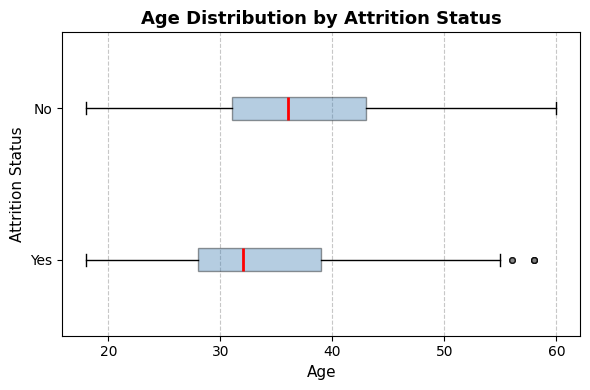

In [11]:
data = [age_attrition_yes, age_attrition_no]
labels = ['Yes', 'No']

plt.figure(figsize=(6,4))

plt.boxplot(
    data,
    labels=labels,
    vert=False,                           
    patch_artist=True,
    boxprops=dict(facecolor='steelblue', alpha=0.4),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.6)
)

plt.title('Age Distribution by Attrition Status', fontsize=13, fontweight='bold')
plt.xlabel('Age', fontsize=11)
plt.ylabel('Attrition Status', fontsize=11)

plt.grid(axis='x', linestyle='--', alpha=0.7)        # grid style consistent with your charts
plt.tight_layout()
plt.show()

In [12]:
bins = [17, 25, 30, 35, 40, 50, 60]  
labels = ['18–25', '26–30', '31–35', '36–40', '41–50', '51+']

dataset['AgeBin'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=True)

age_bin_percentage = dataset['AgeBin'].value_counts(normalize=True) * 100
age_bin_contribution_percentage = pd.crosstab(dataset['AgeBin'], dataset['Attrition'], normalize=True) * 100
age_bin_attrition_rate = (pd.crosstab(dataset['AgeBin'], dataset['Attrition'], normalize='index') * 100)

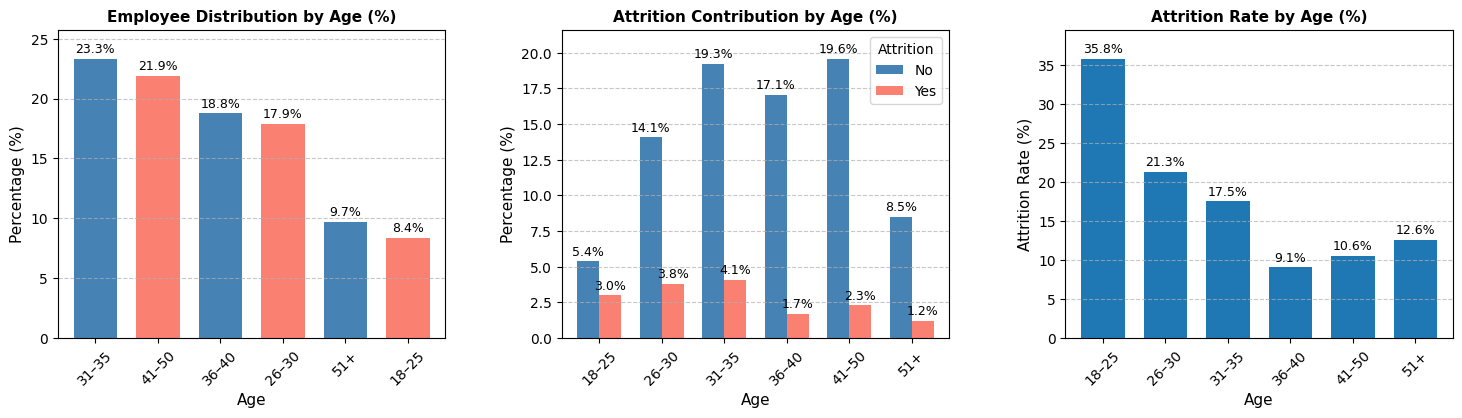

In [13]:
variable_name = 'Age'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Bar Chart
age_bin_percentage.plot(kind='bar', ax=ax1, color=['steelblue', 'salmon'], width=0.7)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_xlabel(variable_name, fontsize=11)
ax1.set_ylabel('Percentage (%)', fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.05)
ax1.tick_params(axis='x', rotation=45)

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
age_bin_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
age_bin_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observaion**
* Younger employees (18–25) show the highest attrition risk (~36%), and the boxplot confirms this with a noticeably lower median age (30) for leavers compared to stayers (36).
* Attrition steadily declines through early- and mid-career stages, reaching its lowest level around 36–40 years (~9% attrition), and the wider age spread among non-leavers reflects this stability.
* A slight rebound appears in older employees (51+), but only a few older exits occur, shown as isolated outliers in the boxplot.
* Overall, both numeric age bins and the boxplot indicate that attrition is heavily concentrated in early-career talent, while mid-career employees remain the most stable segment.

<h3 style="color:#444;">Attrition Comparison by Gender</h3>

In [14]:
gender_count = dataset['Gender'].value_counts()
gender_count_by_attrition = pd.crosstab(dataset['Gender'], dataset['Attrition'])

gender_percentage = dataset['Gender'].value_counts(normalize=True) * 100
gender_contribution_percentage = pd.crosstab(dataset['Gender'], dataset['Attrition'], normalize=True) * 100
gender_attrition_rate = pd.crosstab(dataset['Gender'], dataset['Attrition'], normalize='index') * 100

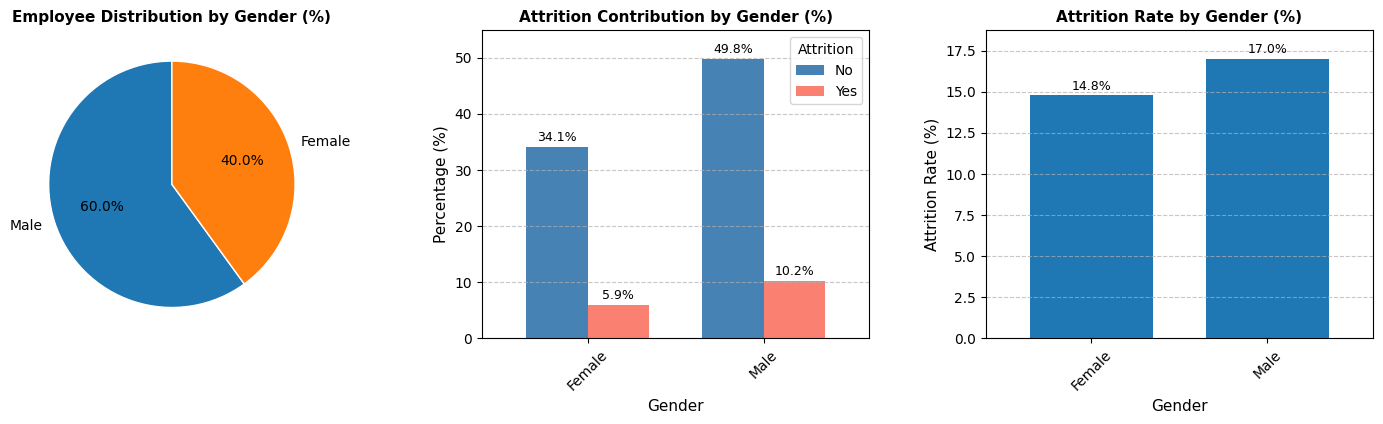

In [15]:
variable_name = 'Gender'

# fig = plt.figure(figsize=(14, 10))
# gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[1, :])

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
gender_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# -> Bar Chart
# gender_percentage.plot(kind='bar', ax=ax1, color=['steelblue', 'salmon'], width=0.7)
# for container in ax1.containers:
#     ax1.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
# ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
# ax1.set_xlabel(variable_name, fontsize=11)
# ax1.set_ylabel('Percentage (%)', fontsize=11)
# ax1.grid(axis='y', linestyle='--', alpha=0.7)
# ax1.set_ylim(0, ax1.get_ylim()[1] * 1.05)
# ax1.tick_params(axis='x', rotation=45)

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
gender_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
gender_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Gender shows a very small difference in attrition rates (Male: 17%, Female: 14.8%), indicating that gender has no meaningful impact on employee turnover.
* The higher attrition count for males is due to the workforce being 60% male, not because males leave more frequently.
* Overall, gender is not a significant driver of attrition.

<h3 style="color:#444;">Attrition Patterns by Marital Status</h3>

In [16]:
marital_status_count = dataset['MaritalStatus'].value_counts()
marital_status_count_by_attrition = pd.crosstab(dataset['MaritalStatus'], dataset['Attrition'])

marital_status_percentage = dataset['MaritalStatus'].value_counts(normalize=True) * 100
marital_status_contribution_percentage = pd.crosstab(dataset['MaritalStatus'], dataset['Attrition'], normalize=True) * 100
marital_status_attrition_rate = pd.crosstab(dataset['MaritalStatus'], dataset['Attrition'], normalize='index') * 100

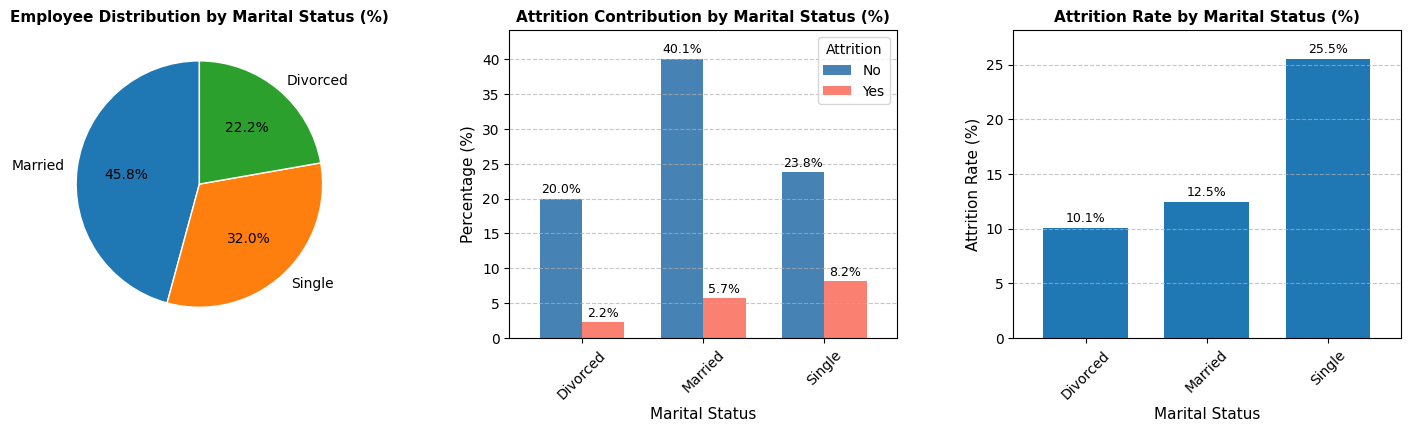

In [17]:
variable_name = 'Marital Status'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
marital_status_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
marital_status_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
marital_status_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Single employees show the highest attrition risk (25.5%), nearly double that of married employees, making them the most vulnerable segment.
* Married (12.5%) and divorced (10.1%) employees show lower and more stable attrition rates, indicating marital stability reduces turnover risk.
* Marital status demonstrates a clear relationship with attrition, with singles contributing the most to both attrition volume and attrition rate.

<h3 style="color:#444;">Attrition Trends Across Education Levels</h3>

In [18]:
education_level_count = dataset['Education'].value_counts()
education_level_count_by_attrition = pd.crosstab(dataset['Education'], dataset['Attrition'])

education_level_percentage = dataset['Education'].value_counts(normalize=True) * 100
education_level_contribution_percentage = pd.crosstab(dataset['Education'], dataset['Attrition'], normalize=True) * 100
education_level_attrition_rate = pd.crosstab(dataset['Education'], dataset['Attrition'], normalize='index') * 100

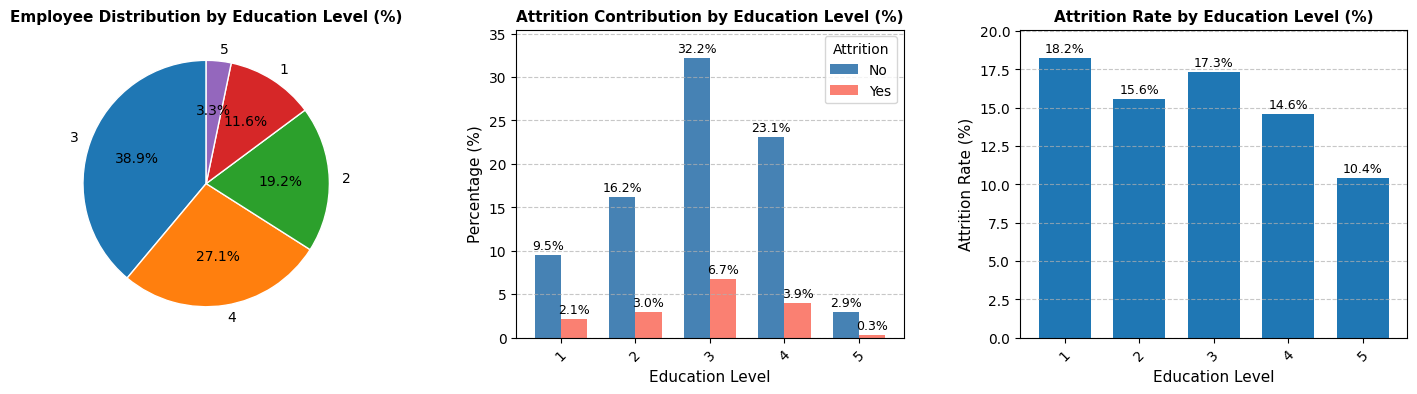

In [19]:
variable_name = 'Education Level'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
education_level_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
education_level_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
education_level_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Attrition rates are relatively similar across education levels (ranging from 10%–18%), showing no strong or consistent relationship between education level and turnover.
* Level 1 and Level 3 show slightly higher attrition rates, but the differences are minor and most likely influenced by job/role distribution rather than education itself.
* Overall, education level is not a meaningful driver of attrition.

<h3 style="color:#444;">Attrition Distribution by Education Field</h3>

In [20]:
education_field_count = dataset['EducationField'].value_counts()
education_field_count_by_attrition = pd.crosstab(dataset['EducationField'], dataset['Attrition'])

education_field_percentage = dataset['EducationField'].value_counts(normalize=True) * 100
education_field_contribution_percentage = pd.crosstab(dataset['EducationField'], dataset['Attrition'], normalize=True) * 100
education_field_attrition_rate = pd.crosstab(dataset['EducationField'], dataset['Attrition'], normalize='index') * 100

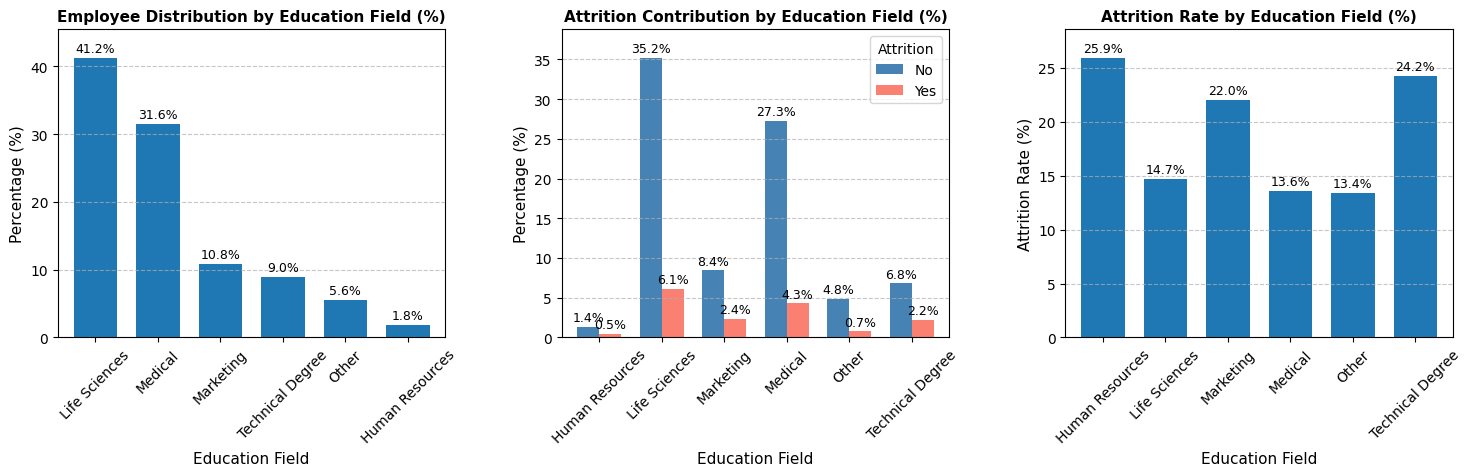

In [21]:
variable_name = 'Education Field'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Bar Chart
education_field_percentage.plot(kind='bar', ax=ax1, width=0.7)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_xlabel(variable_name, fontsize=11)
ax1.set_ylabel('Percentage (%)', fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.05)
ax1.tick_params(axis='x', rotation=45)

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
education_field_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
education_field_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Small education fields such as Human Resources (25.9%), Technical Degree (24.2%), and Marketing (22.0%) show the highest attrition risk, despite contributing fewer total attrition cases.
* Large groups like Life Sciences and Medical contribute the most to attrition volume, but have lower, stable attrition rates (13–15%), indicating stronger retention.
* Education field influences attrition moderately, with specialized or niche fields showing higher turnover likelihood compared to mainstream fields.

**Summary**
* **Age** shows a clear U-shaped attrition pattern: the **youngest employees (18–25)** have the highest turnover, risk drops steadily through mid-career (lowest at **36–40**), and rises slightly again for older employees. Attrition is heavily concentrated among early-career talent.
* **Gender** differences in attrition are minimal. Males have a slightly higher attrition percentage, but the gap is small, indicating that gender is not a major driver of turnover in this dataset.
* **Marital Status** shows notable differences: **single employees** experience significantly higher attrition than married or divorced employees. This suggests that personal and life-stage stability may influence retention.
* **Education Level** has **no strong relationship** with attrition — all education groups show similar turnover levels. Higher degrees do not necessarily correlate with increased or decreased attrition risk.
* **Education Field** shows some variation, with **HR, Marketing, and Technical Degrees** having slightly higher attrition, while **Life Sciences and Medical fields** are more stable. However, the effect is mild compared to job-related factors like role, income, or overtime.

## 4.3 Work & Life Balance Factors
Workplace experience plays a major role in employee decisions.

Variables include:

* OverTime
* WorkLifeBalance
* JobInvolvement
* EnvironmentSatisfaction
* JobSatisfaction

This section analyzes how workload, satisfaction, and daily job environment relate to attrition.

<h3 style="color:#444;">Impact of Overtime on Attrition</h3>

In [22]:
overtime_count = dataset['OverTime'].value_counts()
overtime_count_by_attrition = pd.crosstab(dataset['OverTime'], dataset['Attrition'])

overtime_percentage = dataset['OverTime'].value_counts(normalize=True) * 100
overtime_contribution_percentage = pd.crosstab(dataset['OverTime'], dataset['Attrition'], normalize=True) * 100
overtime_attrition_rate = pd.crosstab(dataset['OverTime'], dataset['Attrition'], normalize='index') * 100

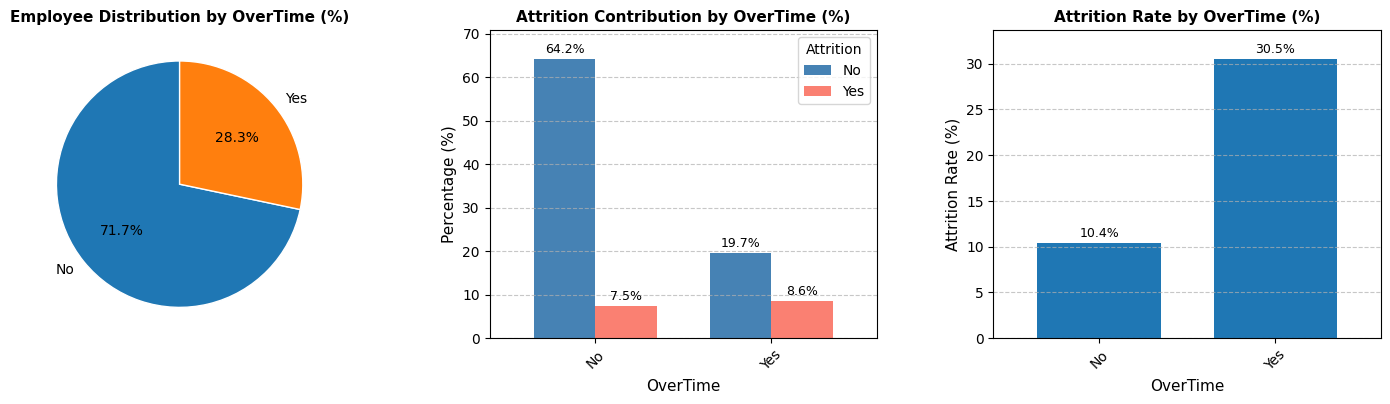

In [23]:
variable_name = 'OverTime'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
overtime_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
overtime_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
overtime_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Overtime employees face a significantly higher attrition risk (30.5%), nearly three times that of non-overtime employees (10.4%).
* Despite being only 28% of the workforce, overtime workers contribute more to total attrition, indicating a strong link between workload and turnover.
* OverTime is one of the clearest and strongest predictors of attrition in the dataset, highlighting potential burnout and work-life imbalance issues.

<h3 style="color:#444;">Attrition by Work-Life Balance Ratings</h3>

In [24]:
wlb_count = dataset['WorkLifeBalance'].value_counts()
wlb_count_by_attrition = pd.crosstab(dataset['WorkLifeBalance'], dataset['Attrition'])

wlb_percentage = dataset['WorkLifeBalance'].value_counts(normalize=True) * 100
wlb_contribution_percentage = pd.crosstab(dataset['WorkLifeBalance'], dataset['Attrition'], normalize=True) * 100
wlb_attrition_rate = pd.crosstab(dataset['WorkLifeBalance'], dataset['Attrition'], normalize='index') * 100

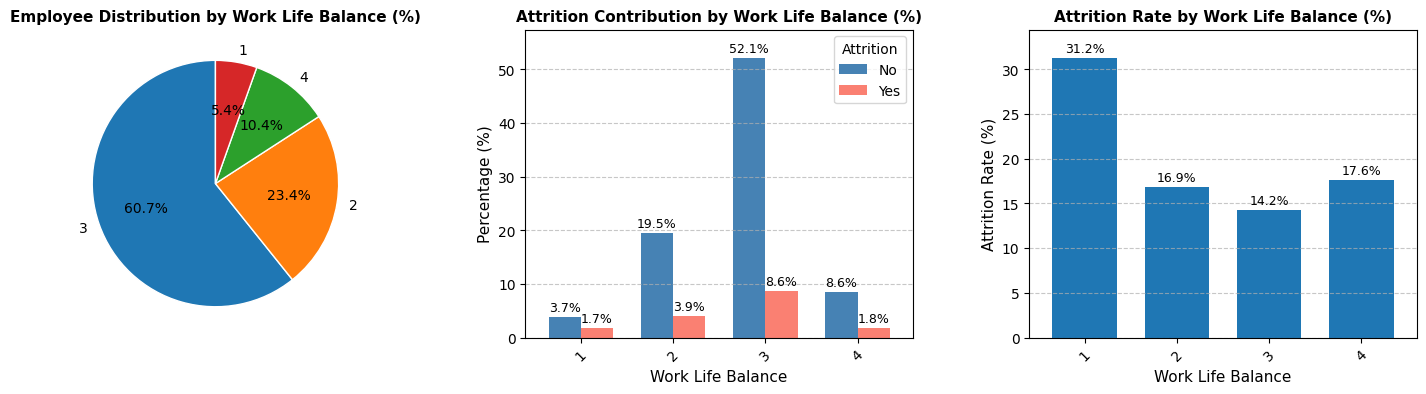

In [25]:
variable_name = 'Work Life Balance'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
wlb_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
wlb_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
wlb_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* WorkLifeBalance = 1 shows a very high attrition rate (31%), far above all other levels, indicating that severe work–life imbalance is a strong attrition driver.
* WLB levels 2, 3, and 4 have similar attrition rates (14–17%), showing that improvements above the minimum level do not significantly change turnover risk.
* Attrition risk is non-linear—it spikes only at the lowest WorkLifeBalance level, not across the entire scale.

<h3 style="color:#444;">Attrition Trends Across Job Involvement Levels</h3>

In [26]:
jobinv_count = dataset['JobInvolvement'].value_counts()
jobinv_count_by_attrition = pd.crosstab(dataset['JobInvolvement'], dataset['Attrition'])

jobinv_percentage = dataset['JobInvolvement'].value_counts(normalize=True) * 100
jobinv_contribution_percentage = pd.crosstab(dataset['JobInvolvement'], dataset['Attrition'], normalize=True) * 100
jobinv_attrition_rate = pd.crosstab(dataset['JobInvolvement'], dataset['Attrition'], normalize="index") * 100

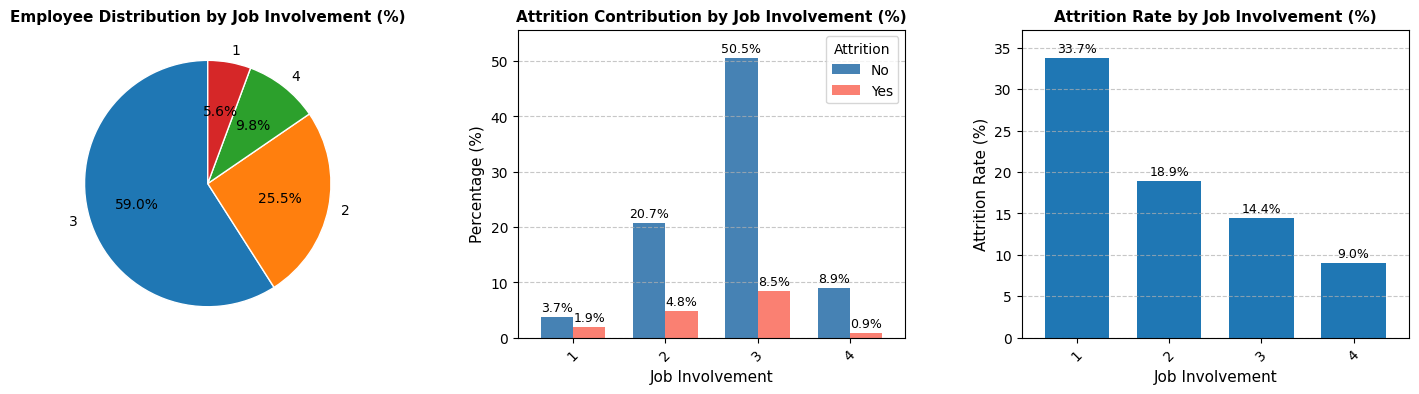

In [27]:
variable_name = 'Job Involvement'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
jobinv_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
jobinv_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
jobinv_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Attrition decreases consistently as JobInvolvement increases, with Level 1 showing the highest attrition rate (33.7%) and Level 4 the lowest (9%).
* Low-involvement employees are over three times more likely to leave than highly engaged employees, making JobInvolvement a strong attrition predictor.
* Job involvement shows a clear monotonic relationship with turnover, highlighting engagement as a critical factor in retention.

<h3 style="color:#444;">Attrition Across Environment Satisfaction Levels</h3>

In [28]:
env_satisfaction_count = dataset['EnvironmentSatisfaction'].value_counts()
env_satisfaction_count_by_attrition = pd.crosstab(dataset['EnvironmentSatisfaction'], dataset['Attrition'])

env_satisfaction_percentage = dataset['EnvironmentSatisfaction'].value_counts(normalize=True) * 100
env_satisfaction_contribution_percentage = pd.crosstab(dataset['EnvironmentSatisfaction'], dataset['Attrition'], normalize=True) * 100
env_satisfaction_attrition_rate = pd.crosstab(dataset['EnvironmentSatisfaction'], dataset['Attrition'], normalize='index') * 100

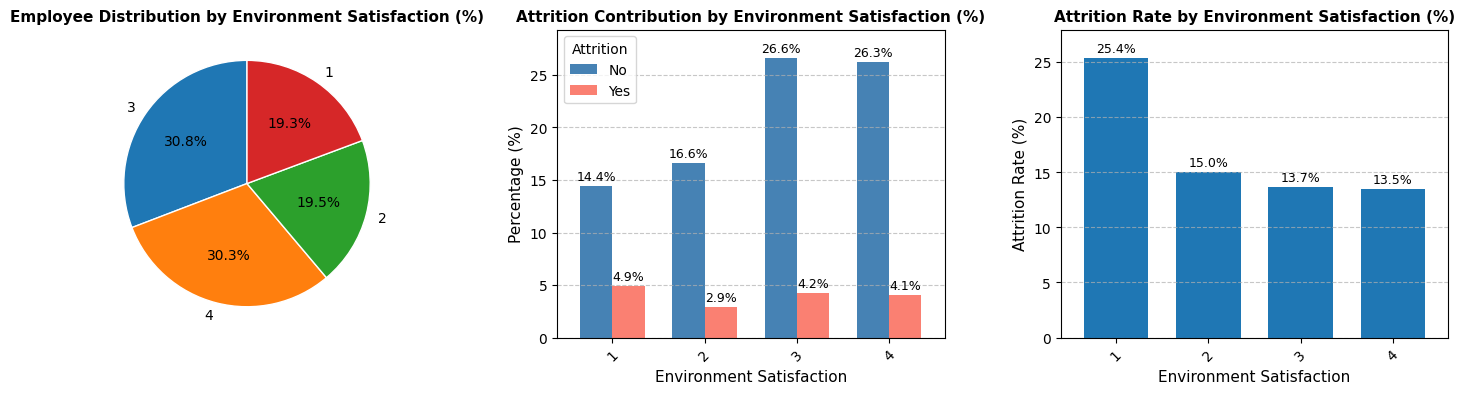

In [29]:
variable_name = 'Environment Satisfaction'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
env_satisfaction_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
env_satisfaction_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
env_satisfaction_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* EnvironmentSatisfaction = 1 shows the highest attrition rate (25.3%), nearly double the other levels, making dissatisfaction a clear risk signal.
* Attrition levels for satisfaction grades 2–4 remain stable around 13–15%, indicating that improving conditions above a basic threshold offers limited retention benefits.
* Poor environment satisfaction is a direct and meaningful driver of attrition, with strong influence at the lowest level.
* The relationship is non-linear and spikes only at the lowest level, similar to WorkLifeBalance.

<h3 style="color:#444;">Attrition by Job Satisfaction Scores</h3>

In [30]:
job_satisfaction_count = dataset['JobSatisfaction'].value_counts()
job_satisfaction_count_by_attrition = pd.crosstab(dataset['JobSatisfaction'], dataset['Attrition'])

job_satisfaction_percentage = dataset['JobSatisfaction'].value_counts(normalize=True) * 100
job_satisfaction_contribution_percentage = pd.crosstab(dataset['JobSatisfaction'], dataset['Attrition'], normalize=True) * 100
job_satisfaction_attrition_rate = pd.crosstab(dataset['JobSatisfaction'], dataset['Attrition'], normalize='index') * 100

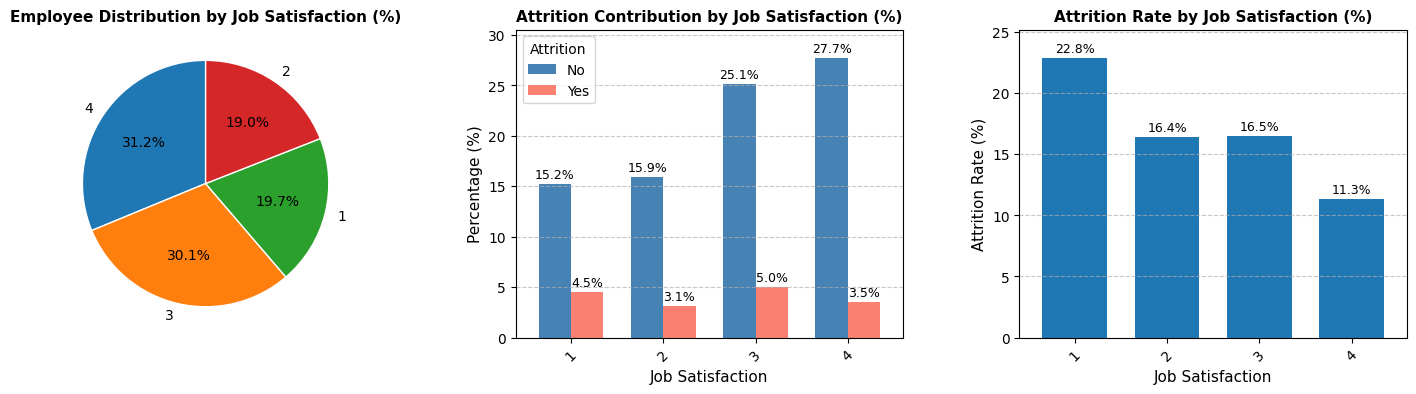

In [31]:
variable_name = 'Job Satisfaction'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
job_satisfaction_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
job_satisfaction_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
job_satisfaction_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* JobSatisfaction = 1 shows the highest attrition risk (22.8%), while Level 4 has the lowest (11.3%), confirming a clear inverse relationship between satisfaction and turnover.
* Satisfaction levels 2 and 3 exhibit similar mid-range attrition rates (~16.5%), suggesting only the lowest and highest satisfaction tiers meaningfully shift attrition risk.
* Job satisfaction is a strong predictor of attrition, with low satisfaction significantly increasing the likelihood of employee exit.

**Summary**
* **OverTime** is one of the strongest attrition drivers. Employees working overtime show an attrition rate nearly **three times higher** than those who do not, reflecting workload pressure and burnout.
* **WorkLifeBalance** shows a mild but clear pattern: employees with **low work–life balance ratings (1–2)** have higher attrition compared to those reporting better balance (3–4).
* **JobInvolvement** has a strong relationship with turnover. Employees with **low involvement** leave at much higher rates, and attrition steadily decreases as involvement increases, reflecting the importance of engagement and role ownership.
* **EnvironmentSatisfaction** directly impacts attrition. Employees dissatisfied with their work environment show higher turnover, while those with better satisfaction levels exhibit significantly stronger retention.
* **JobSatisfaction** aligns closely with attrition patterns as well. Lower satisfaction corresponds to higher turnover, and attrition declines consistently as satisfaction improves.

## 4.4 Compensation & Reward Factors
Compensation is one of the strongest motivators in retention. This section examines whether salary, raises, job level, or stock options influence an employee’s decision to stay or leave.

Variables include:

* MonthlyIncome
* PercentSalaryHike
* JobLevel
* StockOptionLevel

<h3 style="color:#444;">Income Distribution and Its Relation to Attrition</h3>

In [32]:
median_income_by_attrition = dataset.groupby('Attrition')['MonthlyIncome'].median()

income_attrition_yes = dataset.loc[dataset['Attrition'] == 'Yes', 'MonthlyIncome']
mean_income_attrition_yes = income_attrition_yes.mean()
income_attrition_no  = dataset.loc[dataset['Attrition'] == 'No',  'MonthlyIncome']
mean_income_attrition_no = income_attrition_no.mean()

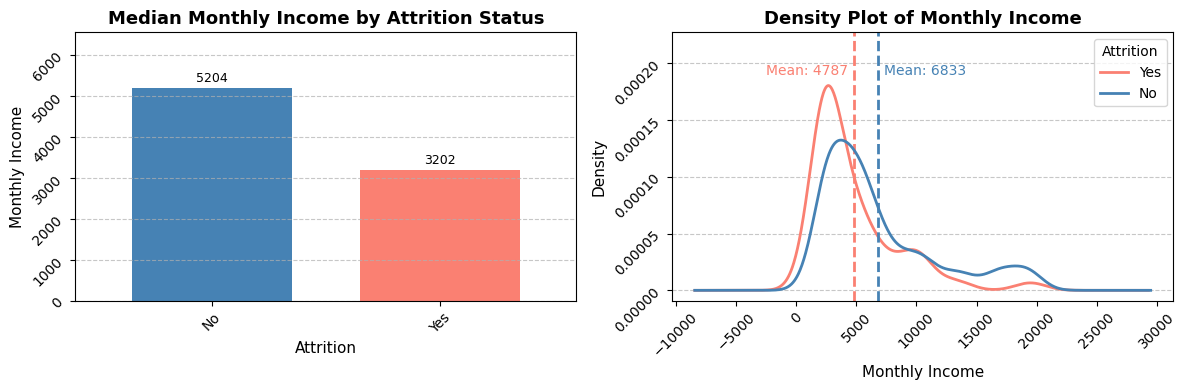

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

median_income_by_attrition.plot(kind='bar', color=['steelblue', 'salmon'], ax=axes[0], width=0.7)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)
axes[0].set_title('Median Monthly Income by Attrition Status', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=11)
axes[0].set_ylabel('Monthly Income', fontsize=11)
axes[0].set_ylim(0, axes[0].get_ylim()[1] * 1.2)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=45)

income_attrition_yes.plot(kind='kde', ax=axes[1], color='salmon', linewidth=2, label='Yes')
axes[1].axvline(mean_income_attrition_yes, color='salmon', linestyle='--', linewidth=2)
axes[1].text(mean_income_attrition_yes - 500, plt.ylim()[1], f'Mean: {mean_income_attrition_yes:.0f}',color='salmon', ha='right')

income_attrition_no.plot(kind='kde', ax=axes[1], color='steelblue', linewidth=2, label='No')
axes[1].axvline(mean_income_attrition_no, color='steelblue', linestyle='--', linewidth=2)
axes[1].text(mean_income_attrition_no + 500, plt.ylim()[1], f'Mean: {mean_income_attrition_no:.0f}',color='steelblue')

axes[1].set_title('Density Plot of Monthly Income', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Monthly Income', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].set_ylim(axes[1].get_ylim()[0], axes[1].get_ylim()[1] * 1.2)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=45)
axes[1].legend(title='Attrition')

plt.tight_layout()
plt.show()

In [34]:
bins = [1000, 2911, 4919, 8379, 20000]
labels = ['Low', 'Lower-Mid', 'Upper-Mid', 'High']

dataset['IncomeBin'] = pd.cut(dataset['MonthlyIncome'], bins=bins, labels=labels, right=True)
income_percentage = dataset['IncomeBin'].value_counts(normalize=True) * 100
income_contribution_percentage = pd.crosstab(dataset['IncomeBin'], dataset['Attrition'], normalize=True) * 100
income_attrition_rate = attrition_rate = pd.crosstab(dataset['IncomeBin'], dataset['Attrition'], normalize='index') * 100

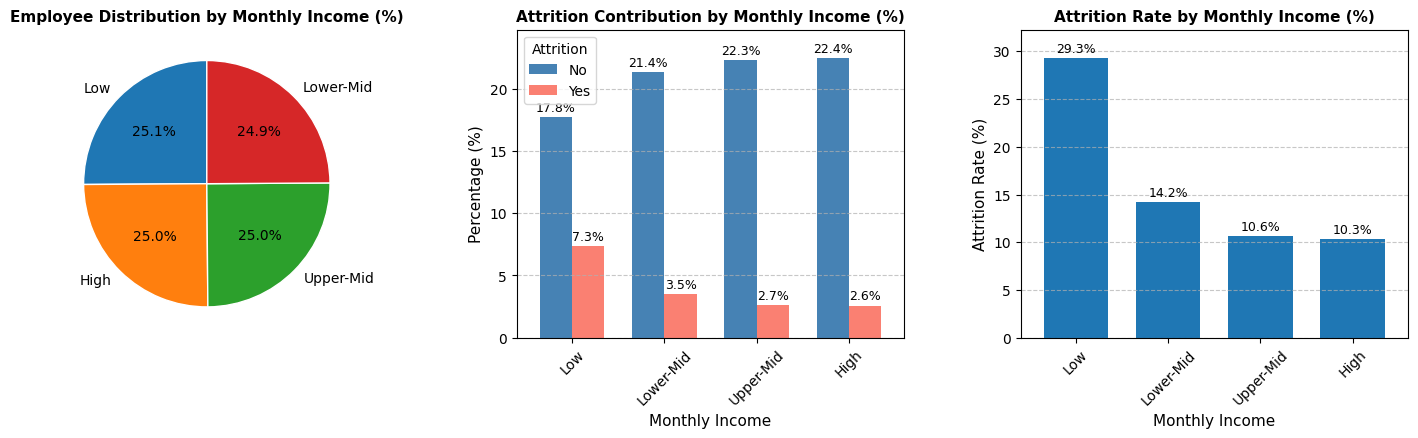

In [35]:
variable_name = 'Monthly Income'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
income_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
income_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
income_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Note -** Monthly Income was binned using quartiles instead of uniform ranges because the income distribution is heavily skewed. Quartile bins produce balanced groups and allow fair, meaningful comparison of attrition rates across salary levels.

**Observation**
* Employees in the lowest income quartile have the highest attrition risk (29%), nearly three times higher than those in the top income groups (~10%).
* Attrition drops sharply after the low-income segment, indicating that pay is a strong and direct driver of turnover.
* Both the KDE and bin-level analysis confirm that leavers are heavily concentrated in the lower salary ranges, while higher-income employees show significantly better retention.

<h3 style="color:#444;">Attrition by Salary Hike Percentage</h3>

In [36]:
mean_salary_hike = dataset.groupby('Attrition')['PercentSalaryHike'].mean()

salary_hike_attrition_yes = dataset[dataset['Attrition'] == 'Yes']['PercentSalaryHike']
mean_salary_hike_attrition_yes = salary_hike_attrition_yes.mean()
salary_hike_attrition_no = dataset[dataset['Attrition'] == 'No']['PercentSalaryHike']
mean_salary_hike_attrition_no = salary_hike_attrition_no.mean()

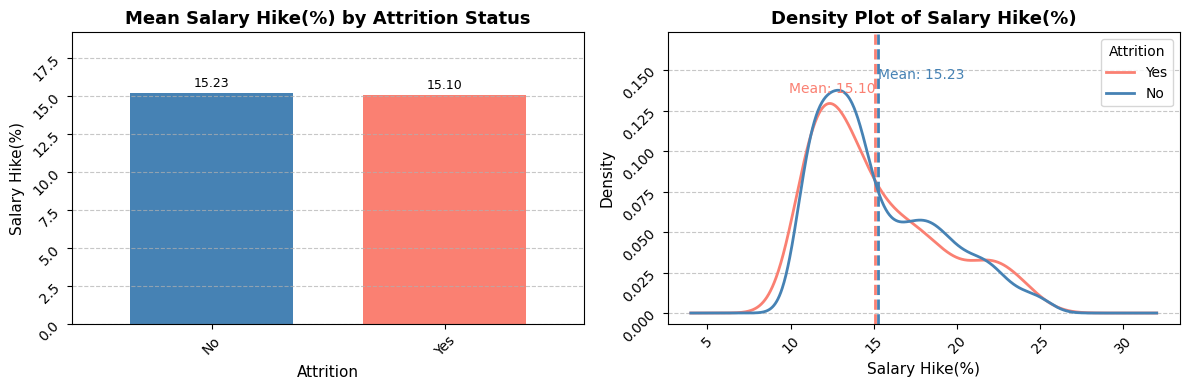

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

mean_salary_hike.plot(kind='bar', color=['steelblue', 'salmon'], ax=axes[0], width=0.7)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=2)
axes[0].set_title('Mean Salary Hike(%) by Attrition Status', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=11)
axes[0].set_ylabel('Salary Hike(%)', fontsize=11)
axes[0].set_ylim(0, axes[0].get_ylim()[1] * 1.2)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=45)

salary_hike_attrition_yes.plot(kind='kde', ax=axes[1], color='salmon', linewidth=2, label='Yes')
axes[1].axvline(mean_salary_hike_attrition_yes, color='salmon', linestyle='--', linewidth=2)
axes[1].text(mean_salary_hike_attrition_yes, plt.ylim()[1], f'Mean: {mean_salary_hike_attrition_yes:.2f}',color='salmon', ha='right')

salary_hike_attrition_no.plot(kind='kde', ax=axes[1], color='steelblue', linewidth=2, label='No')
axes[1].axvline(mean_salary_hike_attrition_no, color='steelblue', linestyle='--', linewidth=2)
axes[1].text(mean_salary_hike_attrition_no, plt.ylim()[1], f'Mean: {mean_salary_hike_attrition_no:.2f}',color='steelblue')

axes[1].set_title('Density Plot of Salary Hike(%)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Salary Hike(%)', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].set_ylim(axes[1].get_ylim()[0], axes[1].get_ylim()[1] * 1.2)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=45)
axes[1].legend(title='Attrition')

plt.tight_layout()
plt.show()

<h3 style="color:#444;">Attrition Trends Across Job Levels</h3>

In [38]:
job_level_count = dataset['JobLevel'].value_counts()
job_level_count_by_attrition = pd.crosstab(dataset['JobLevel'], dataset['Attrition'])

job_level_percentage = dataset['JobLevel'].value_counts(normalize=True) * 100
job_level_contribution_percentage = pd.crosstab(dataset['JobLevel'], dataset['Attrition'], normalize=True) * 100
job_level_attrition_rate = pd.crosstab(dataset['JobLevel'], dataset['Attrition'], normalize='index') * 100

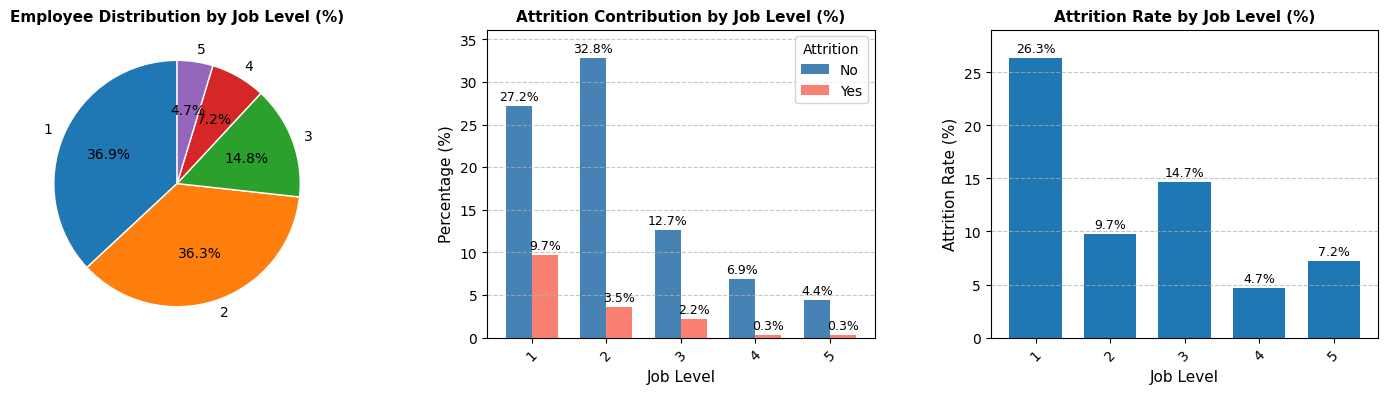

In [39]:
variable_name = 'Job Level'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
job_level_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
job_level_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
job_level_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* **Entry-level employees (JL1)** are highly likely to leave — possibly due to low pay, early-career mobility, lack of growth, or job mismatch.
* **Mid-level employees (JL2 & JL3)** show moderate to low attrition, suggesting more stability.
* **Senior employees (JL4 & JL5)** show very low attrition due to career maturity, higher compensation, and stability.
* Risk decreases significantly as job level increases.

<h3 style="color:#444;">Attrition Distribution by Stock Option Level</h3>

In [40]:
stock_option_level_count = dataset['StockOptionLevel'].value_counts()
stock_option_level_count_by_attrition = pd.crosstab(dataset['StockOptionLevel'], dataset['Attrition'])

stock_option_level_percentage = dataset['StockOptionLevel'].value_counts(normalize=True) * 100
stock_option_level_contribution_percentage = pd.crosstab(dataset['StockOptionLevel'], dataset['Attrition'], normalize=True) * 100
stock_option_level_attrition_rate = pd.crosstab(dataset['StockOptionLevel'], dataset['Attrition'], normalize='index') * 100

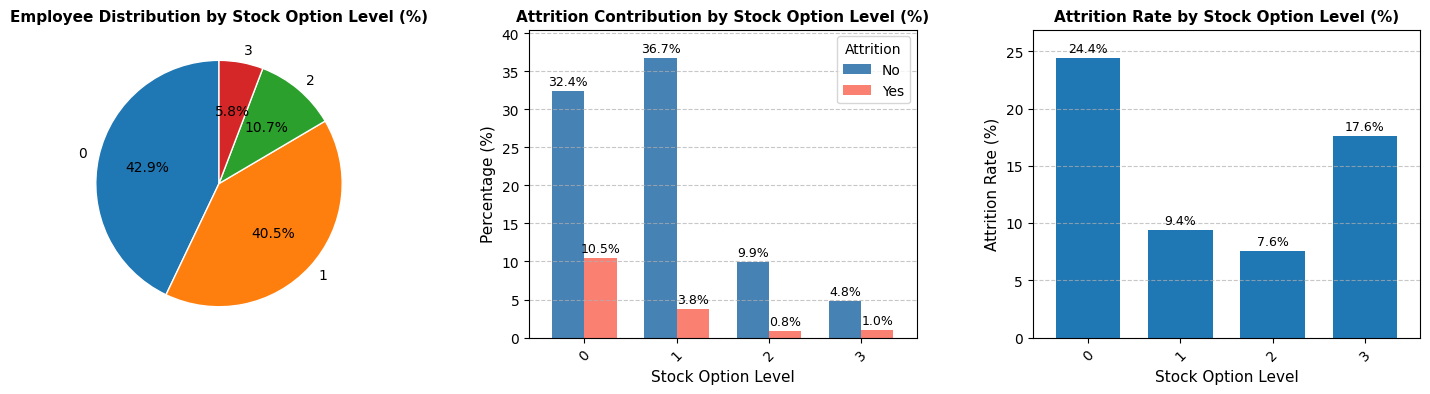

In [41]:
variable_name = 'Stock Option Level'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
stock_option_level_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
stock_option_level_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
stock_option_level_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* **StockOptionLevel 0 shows the highest attrition risk (24.4%),** indicating employees without stock options are far more likely to leave.
* Attrition drops sharply at Levels 1 and 2 (7–9%), suggesting stock options have a **strong retention effect** for most employees.
* Level 3 shows a higher rate due to small sample size, but overall, **lack of stock incentives is a notable attrition driver.**

**Summary**
* **MonthlyIncome** shows one of the strongest compensation-related effects on attrition. Employees in the **lowest income quartile have an attrition rate of ~29%**, nearly **three times higher** than those in the upper income quartiles (10%). Attrition decreases sharply as income increases, showing that compensation plays a major role in retention.
* **PercentSalaryHike** has minimal influence on attrition. Despite small variations across employees, attrition rates remain fairly similar, indicating that modest annual raises **do not significantly affect turnover** compared to base salary levels.
* **JobLevel** strongly influences attrition risk. Lower job levels (entry- to mid-level roles) experience much higher attrition, while senior job levels show **very low turnover**, reflecting better pay, stability, and career satisfaction.
* **StockOptionLevel** provides a moderate retention effect. Employees with **zero stock options** show higher attrition, while those with higher stock option levels tend to stay longer, suggesting that long-term rewards and ownership incentives support retention—though not as strongly as income or job level.

## 4.5 Career Growth & Tenure Factors
Career progression is a major reason employees stay or leave. This section focuses on variables that reflect tenure, promotion timelines, experience, and time in role. Because these are non-linear, they are analyzed using meaningful bins and attrition percentages.

Variables include:

* YearsSinceLastPromotion
* YearsAtCompany
* TotalWorkingYears
* YearsInCurrentRole
* YearsWithCurrManager

<h3 style="color:#444;">Attrition by Time Since Last Promotion</h3>

In [42]:
dataset['PromotionBin'] = pd.cut(
    dataset['YearsSinceLastPromotion'],
    bins=[-1, 0, 3, 6, 40],
    labels=['0', '1–3', '4–6', '7+']
)

In [43]:
year_since_last_promotion = dataset['PromotionBin'].value_counts()
year_since_last_promotion_by_attrition = pd.crosstab(dataset['PromotionBin'], dataset['Attrition'])

year_since_last_promotion_percentage = dataset['PromotionBin'].value_counts(normalize=True) * 100
year_since_last_promotion_contribution_percentage = pd.crosstab(dataset['PromotionBin'], dataset['Attrition'], normalize=True) * 100
year_since_last_promotion_attrition_rate = pd.crosstab(dataset['PromotionBin'], dataset['Attrition'], normalize='index') * 100

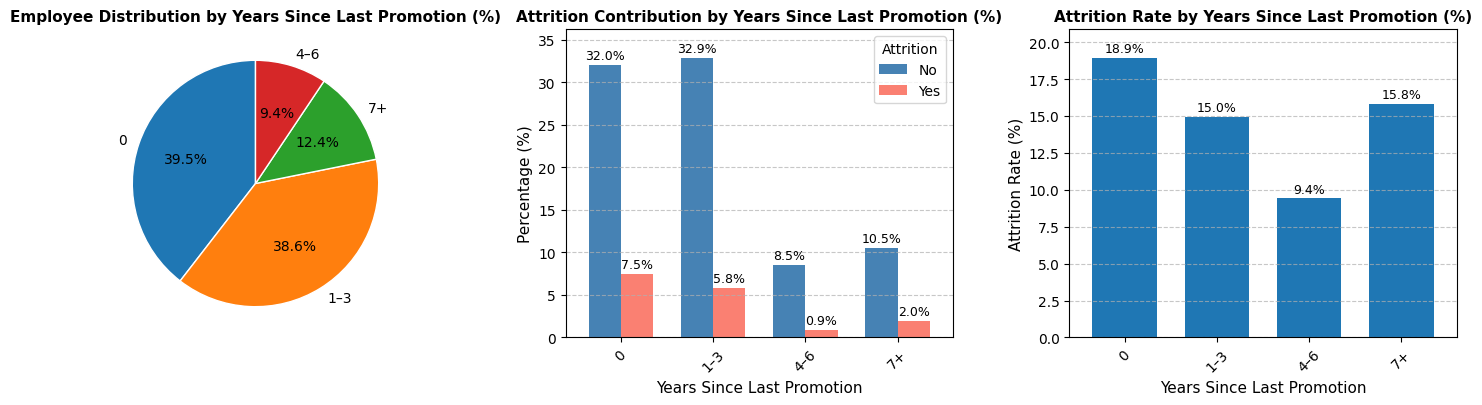

In [44]:
variable_name = 'Years Since Last Promotion'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
year_since_last_promotion_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
year_since_last_promotion_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
year_since_last_promotion_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Attrition is highest among employees with **0 years since last promotion (18.9%)**, indicating instability among newly promoted staff or those who have never been promoted.
* Turnover drops to its lowest in the **4–6 year group (9.4%)**, representing the most stable phase in the promotion cycle.
* Attrition rises again for employees with **7+ years since last promotion (15.8%)**, pointing to disengagement caused by long-term stagnation.
* The pattern forms a **U-shaped curve**, with higher attrition at the start and after long stagnation, and lowest attrition for employees who are mid-cycle.

<h3 style="color:#444;">Attrition Across Company Tenure</h3>

In [45]:
dataset['CompanyTenureBin'] = pd.cut(
    dataset['YearsAtCompany'],
    bins = [-1, 2, 5, 10, 20, 40],
    labels = ['0–2', '3–5', '6–10', '11–20', '21+']
)

In [46]:
year_at_company = dataset['CompanyTenureBin'].value_counts()
year_at_company_by_attrition = pd.crosstab(dataset['CompanyTenureBin'], dataset['Attrition'])

year_at_company_percentage = dataset['CompanyTenureBin'].value_counts(normalize=True) * 100
year_at_company_contribution_percentage = pd.crosstab(dataset['CompanyTenureBin'], dataset['Attrition'], normalize=True) * 100
year_at_company_attrition_rate = pd.crosstab(dataset['CompanyTenureBin'], dataset['Attrition'], normalize='index') * 100

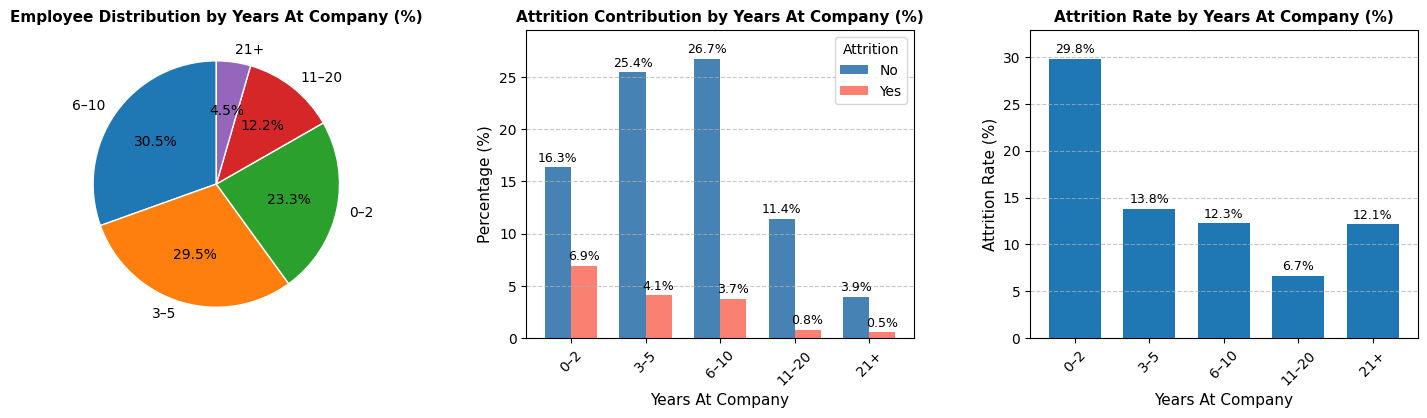

In [47]:
variable_name = 'Years At Company'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
year_at_company_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
year_at_company_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
year_at_company_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Employees in their **first 2 years** at the company show **very high attrition (≈30%)**, making early-tenure turnover the biggest risk area.
* Attrition decreases sharply as tenure increases, stabilizing around **3–10 years**, where employees show the strongest retention.
* Long-tenured employees (11–20 years) have the **lowest attrition (≈6.7%)**, indicating deep organizational loyalty.
* Attrition rises slightly for employees with **21+ years of tenure**, and while this group is small, the exits are likely driven by **retirement-transition behavior and limited mobility at very high tenure levels**.
* The overall trend forms a downward-sloping curve with a late-career bump, mirroring common real-world tenure–retention patterns.

<h3 style="color:#444;">Attrition by Total Work Experience</h3>

In [48]:
dataset['CareerStageBin'] = pd.cut(
    dataset['TotalWorkingYears'],
    bins=[-1, 3, 8, 15, 60],
    labels=[
        '0–3',
        '4–8',
        '9–15',
        '16+'
    ]
)

In [49]:
total_working_years = dataset['CareerStageBin'].value_counts()
total_working_years_by_attrition = pd.crosstab(dataset['CareerStageBin'], dataset['Attrition'])

total_working_years_percentage = dataset['CareerStageBin'].value_counts(normalize=True) * 100
total_working_years_contribution_percentage = pd.crosstab(dataset['CareerStageBin'], dataset['Attrition'], normalize=True) * 100
total_working_years_attrition_rate = pd.crosstab(dataset['CareerStageBin'], dataset['Attrition'], normalize='index') * 100

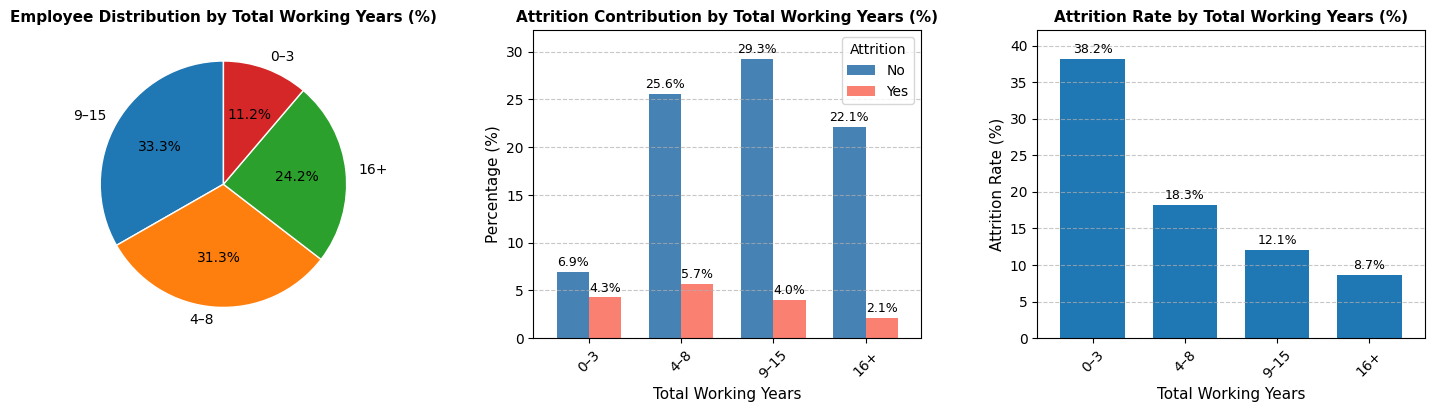

In [50]:
variable_name = 'Total Working Years'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
total_working_years_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
total_working_years_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
total_working_years_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

<h3 style="color:#444;">Attrition by Tenure in Current Role</h3>

In [51]:
dataset['RoleTenureBin'] = pd.cut(
    dataset['YearsInCurrentRole'],
    bins=[-1, 1, 4, 8, 40],
    labels=[
        '0–1',
        '2–4',
        '5–8',
        '9+'
    ]
)

In [52]:
year_in_curr_role = dataset['RoleTenureBin'].value_counts()
year_in_curr_role_by_attrition = pd.crosstab(dataset['RoleTenureBin'], dataset['Attrition'])

year_in_curr_role_percentage = dataset['RoleTenureBin'].value_counts(normalize=True) * 100
year_in_curr_role_contribution_percentage = pd.crosstab(dataset['RoleTenureBin'], dataset['Attrition'], normalize=True) * 100
year_in_curr_role_attrition_rate = pd.crosstab(dataset['RoleTenureBin'], dataset['Attrition'], normalize='index') * 100

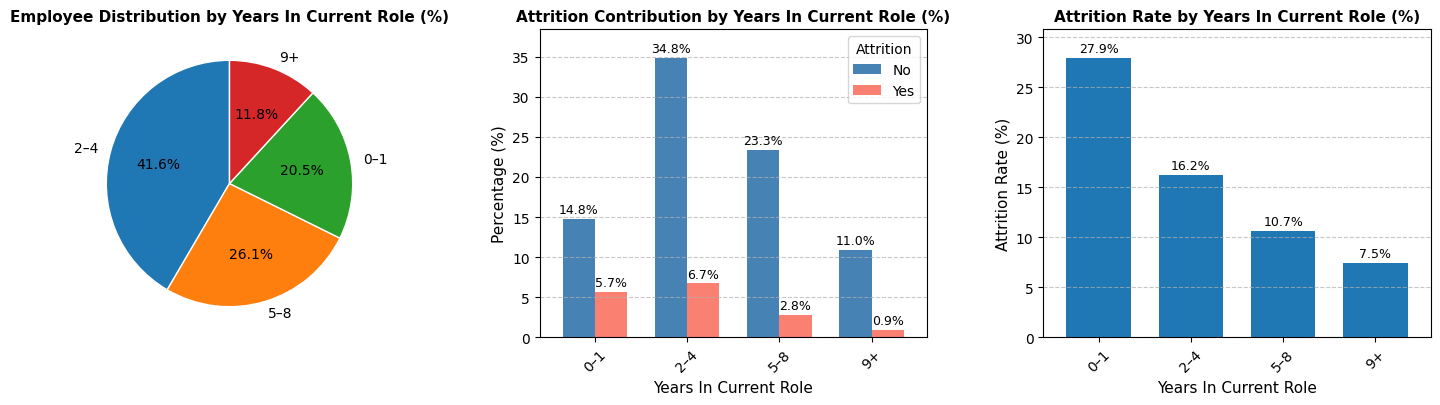

In [53]:
variable_name = 'Years In Current Role'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
year_in_curr_role_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
year_in_curr_role_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
year_in_curr_role_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Employees with **0–1 year in their current role experience the highest attrition (27.9%)**, suggesting onboarding and role-fit issues are major drivers of early churn.
* Attrition steadily declines with role experience, dropping to **16%** in the 2–4 year range and **~11%** in the 5–8 year range.
* Employees with **9+ years in the same role show the lowest attrition (7.5%)**, indicating strong stability and alignment with role expectations.

<h3 style="color:#444;">Attrition by Tenure With Current Manager</h3>

In [54]:
dataset['ManagerTenureBin'] = pd.cut(
    dataset['YearsWithCurrManager'],
    bins = [-1, 1, 4, 8, 17],
    labels = ['0–1', '2–4', '5–8', '9+']
)

In [55]:
year_with_curr_manager = dataset['ManagerTenureBin'].value_counts()
year_with_curr_manager_by_attrition = pd.crosstab(dataset['ManagerTenureBin'], dataset['Attrition'])

year_with_curr_manager_percentage = dataset['ManagerTenureBin'].value_counts(normalize=True) * 100
year_with_curr_manager_contribution_percentage = pd.crosstab(dataset['ManagerTenureBin'], dataset['Attrition'], normalize=True) * 100
year_with_curr_manager_attrition_rate = pd.crosstab(dataset['ManagerTenureBin'], dataset['Attrition'], normalize='index') * 100

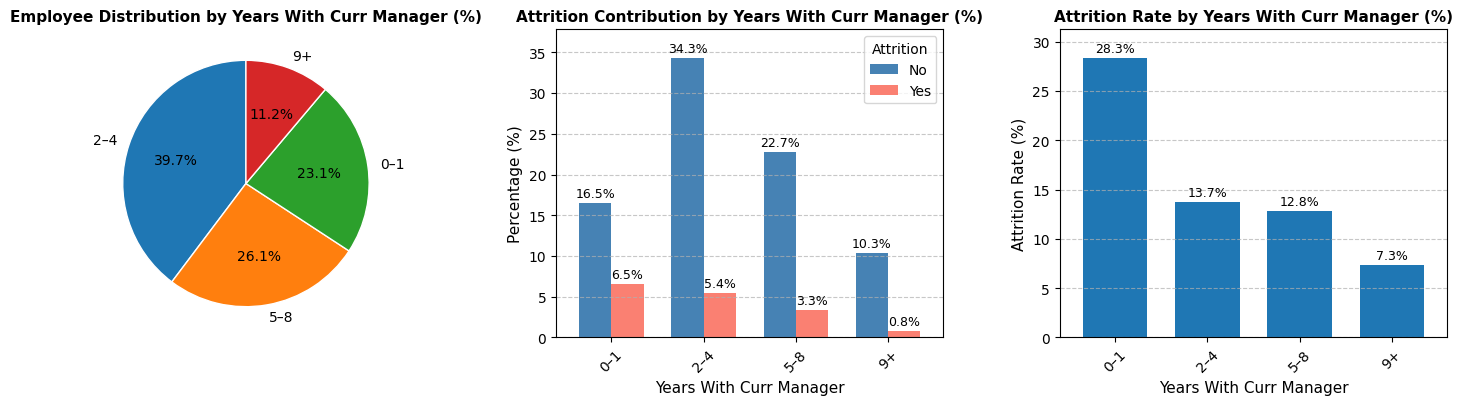

In [56]:
variable_name = 'Years With Curr Manager'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
year_with_curr_manager_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
year_with_curr_manager_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
year_with_curr_manager_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Employees with 0–1 year under their current manager have the highest attrition (28.3%), highlighting the adjustment phase as a key risk period.
* Attrition decreases significantly for employees in the 2–8 year range, stabilizing around 12–14% as manager–employee relationships mature.
* Employees with 9+ years under the same manager show the lowest attrition (7.3%), confirming that long-term managerial continuity strongly supports retention.

**Summary**
* **YearsSinceLastPromotion** shows a U-shaped relationship with attrition. The highest attrition appears among employees with **0 years since last promotion (19%)**, suggesting instability among newly promoted or never-promoted employees. Attrition decreases to its lowest in the **4–6 year range (9%)**, then rises again for employees with **7+ years**, indicating frustration from long-term stagnation.
* **YearsAtCompany** shows a similar pattern. Attrition is highest among **0–2 year employees (30%)**, drops steadily through **3–10 years**, and reaches its lowest in the **11–20 year range (6–7%)**. A mild rise occurs for those with **21+ years**, reflecting late-career transitions or limited mobility at very long tenure.
* **TotalWorkingYears** follows the age/experience curve. Employees with very **low total experience** show higher attrition, while mid-career employees stabilize significantly. This reinforces that early-career employees are more likely to explore new opportunities.
* **YearsInCurrentRole** shows strong early-role turnover: employees with **0–1 year in their role** have the highest attrition (~28%), with risk declining steadily as role experience grows. Long-tenured role-holders **(9+ years)** exhibit the lowest attrition, reflecting stronger role mastery and stability.
* **YearsWithCurrManager** also follows a clear downward trend. Employees with **0–1 year under their current manager** show the highest attrition (~28%), while those with **5–8 years** or **9+ years** under the same manager show the lowest turnover. Manager continuity strongly contributes to retention.

## 4.6 Departmental & Role-Based Factors
This section looks at where attrition is happening inside the organization — across departments, job roles, and travel requirements.

Variables include:

* Department
* JobRole
* BusinessTravel

<h3 style="color:#444;">Attrition Breakdown by Department</h3>

In [57]:
department = dataset['Department'].value_counts()
department_by_attrition = pd.crosstab(dataset['Department'], dataset['Attrition'])

department_percentage = dataset['Department'].value_counts(normalize=True) * 100
department_contribution_percentage = pd.crosstab(dataset['Department'], dataset['Attrition'], normalize=True) * 100
department_attrition_rate = pd.crosstab(dataset['Department'], dataset['Attrition'], normalize='index') * 100

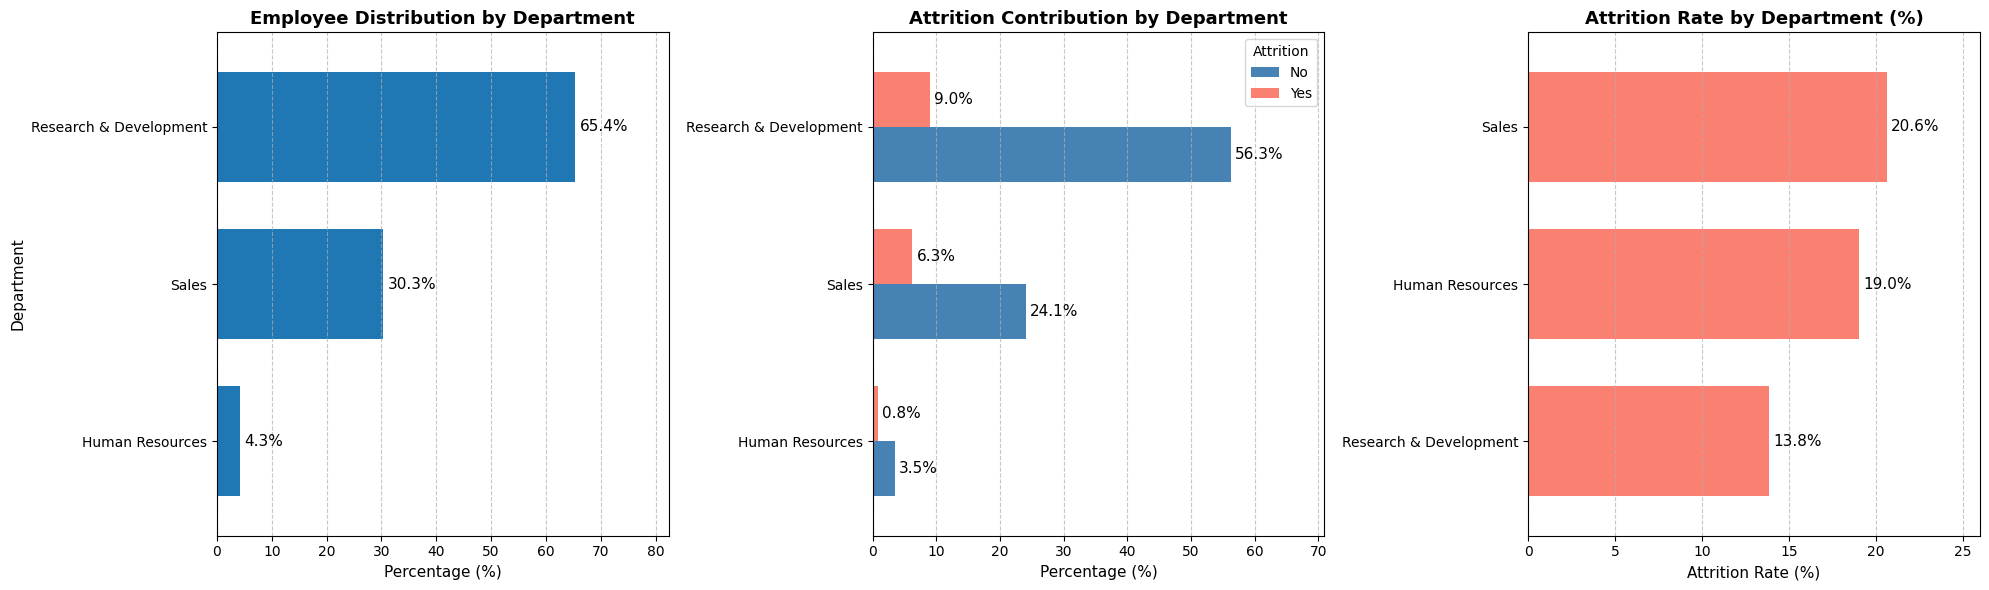

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

department_percentage.sort_values().plot(kind='barh', ax=axes[0], width=0.7)
for c in axes[0].containers:
    axes[0].bar_label(c, fmt='%.1f%%', fontsize=11, padding=3)
axes[0].set_title('Employee Distribution by Department', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Percentage (%)', fontsize=11)
axes[0].set_ylabel('Department', fontsize=11)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
axes[0].set_xlim(0, axes[0].get_xlim()[1] * 1.2)


department_contribution_percentage.sort_values('Yes').plot(kind='barh', ax=axes[1], color=['steelblue', 'salmon'], width=0.7)
for c in axes[1].containers:
    axes[1].bar_label(c, fmt='%.1f%%', fontsize=11, padding=3)
axes[1].set_title('Attrition Contribution by Department', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Percentage (%)', fontsize=11)
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
axes[1].set_xlim(0, axes[1].get_xlim()[1] * 1.2)

department_attrition_rate['Yes'].sort_values().plot(kind='barh', ax=axes[2], color='salmon', width=0.7)
for c in axes[2].containers:
    axes[2].bar_label(c, fmt='%.1f%%', fontsize=11, padding=3)
axes[2].set_title('Attrition Rate by Department (%)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Attrition Rate (%)', fontsize=11)
axes[2].set_ylabel('')
axes[2].grid(axis='x', linestyle='--', alpha=0.7)
axes[2].set_xlim(0, axes[2].get_xlim()[1] * 1.2)

plt.tight_layout()
plt.show()

**Observation**
* **Sales shows the highest attrition rate (20.6%)**, indicating strong turnover pressure compared to R&D (13.8%) and HR (19%).

* Despite contributing the most attrition volume, R&D is actually the **most stable department**, while Sales and HR show disproportionately higher risk.

* Department plays a **significant role in attrition**, with customer-facing and administrative functions facing higher turnover than technical roles.

<h3 style="color:#444;">Attrition Rates Across Job Roles</h3>

In [59]:
job_role = dataset['JobRole'].value_counts()
job_role_by_attrition = pd.crosstab(dataset['JobRole'], dataset['Attrition'])

job_role_percentage = dataset['JobRole'].value_counts(normalize=True) * 100
job_role_contribution_percentage = pd.crosstab(dataset['JobRole'], dataset['Attrition'], normalize=True) * 100
job_role_attrition_rate = pd.crosstab(dataset['JobRole'], dataset['Attrition'], normalize='index') * 100

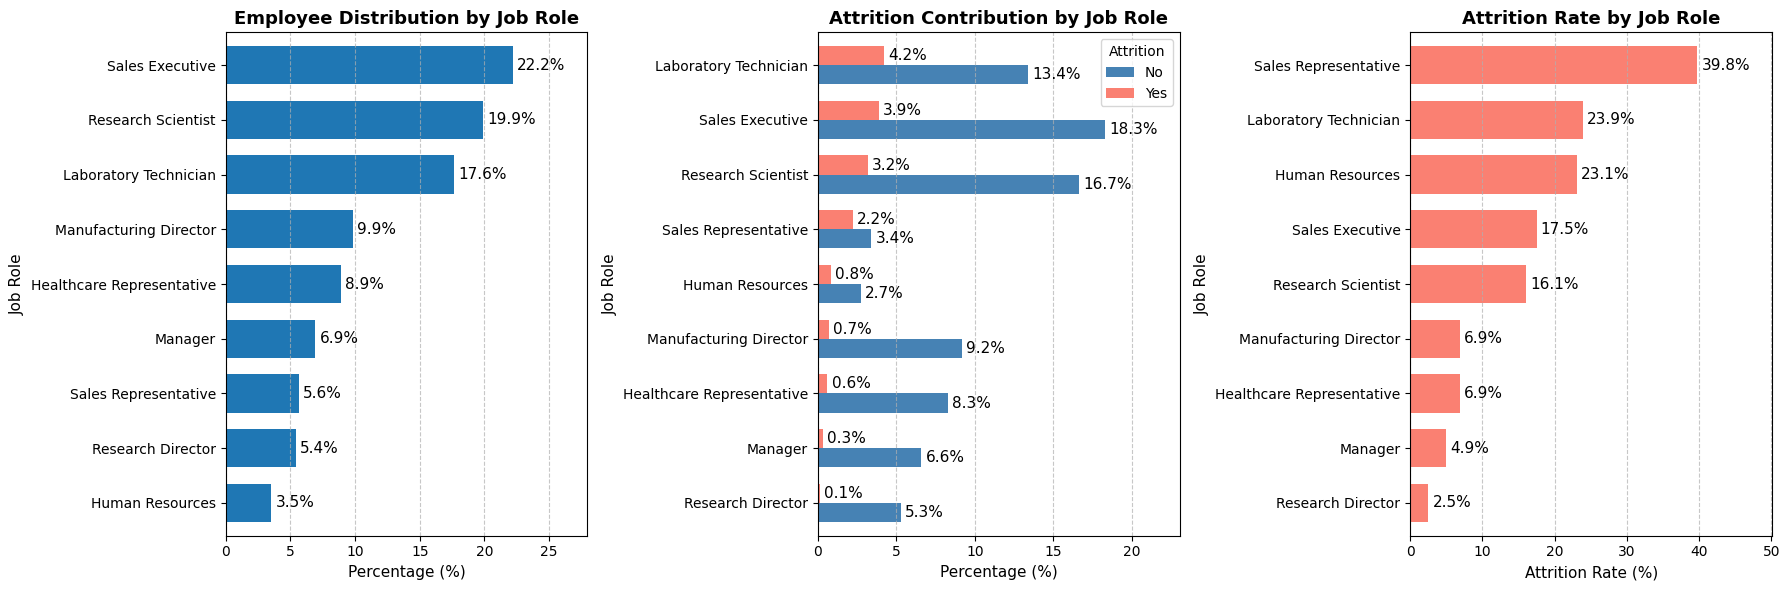

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

job_role_percentage.sort_values().plot(kind='barh', ax=axes[0], width=0.7)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', fontsize=11, padding=3)
axes[0].set_title('Employee Distribution by Job Role', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Percentage (%)', fontsize=11)
axes[0].set_ylabel('Job Role', fontsize=11)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
axes[0].set_xlim(0, axes[0].get_xlim()[1] * 1.2)


job_role_contribution_percentage.sort_values('Yes').plot(kind='barh', ax=axes[1], color=['steelblue', 'salmon'], width=0.7)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', fontsize=11, padding=3)
axes[1].set_title('Attrition Contribution by Job Role', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Percentage (%)', fontsize=11)
axes[1].set_ylabel('Job Role', fontsize=11)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
axes[1].set_xlim(0, axes[1].get_xlim()[1] * 1.2)

job_role_attrition_rate['Yes'].sort_values().plot(kind='barh', ax=axes[2], color='salmon', width=0.7)
for container in axes[2].containers:
    axes[2].bar_label(container, fmt='%.1f%%', fontsize=11, padding=3)
axes[2].set_title('Attrition Rate by Job Role', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Attrition Rate (%)', fontsize=11)
axes[2].set_ylabel('Job Role', fontsize=11)
axes[2].grid(axis='x', linestyle='--', alpha=0.7)
axes[2].set_xlim(0, axes[2].get_xlim()[1] * 1.2)


plt.tight_layout()
plt.show()


**Observation**
* **JobRole shows some of the strongest attrition differences:** Sales Representatives face extremely high turnover (39.8%), followed by Laboratory Technicians and HR roles (~23–24%).
* Senior and specialized roles such as Managers, Research Directors, and Manufacturing Directors show **very low attrition** (2.5%–6.9%), indicating strong retention and job stability.
* This pattern strongly suggests that **role-specific stress, growth paths, and career opportunities drive attrition far more than demographics or education.**

<h3 style="color:#444;">Attrition Based on Business Travel Status</h3>

In [61]:
bussinee_travel_status = dataset['BusinessTravel'].value_counts()
bussinee_travel_status_by_attrition = pd.crosstab(dataset['BusinessTravel'], dataset['Attrition'])

bussinee_travel_status_percentage = dataset['BusinessTravel'].value_counts(normalize=True) * 100
bussinee_travel_status_contribution_percentage = pd.crosstab(dataset['BusinessTravel'], dataset['Attrition'], normalize=True) * 100
bussinee_travel_status_attrition_rate = pd.crosstab(dataset['BusinessTravel'], dataset['Attrition'], normalize='index') * 100

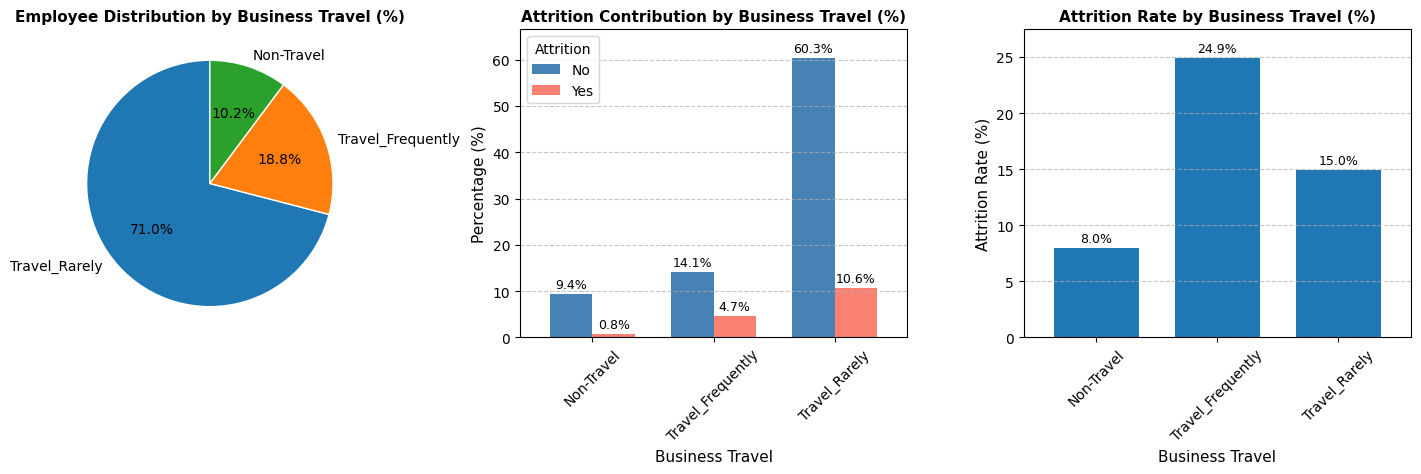

In [62]:
variable_name = 'Business Travel'

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# --- 1. Distribution of the Selected Variable ---
# -> Pie Chart
bussinee_travel_status_percentage.plot(
    kind='pie', 
    ax=ax1, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%'
)
ax1.set_title('Employee Distribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# --- 2. Contribution of Each Category to Overall Attrition (Not Attrition Rate) ---
bussinee_travel_status_contribution_percentage.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'], width=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax2.set_title('Attrition Contribution by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax2.set_xlabel(variable_name, fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.05)
ax2.tick_params(axis='x', rotation=45)

# --- 3. Attrition Rate Within Each Category (Most Important Metric) ---
bussinee_travel_status_attrition_rate['Yes'].plot(kind='bar', ax=ax3, width=0.7)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)
ax3.set_title('Attrition Rate by {} (%)'.format(variable_name), fontsize=11, fontweight='bold')
ax3.set_xlabel(variable_name, fontsize=11)
ax3.set_ylabel('Attrition Rate (%)', fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.05)
ax3.tick_params(axis='x', rotation=45)

plt.show()

**Observation**
* Employees who **travel frequently show the highest attrition rate (24.9%)**, nearly triple that of non-travelers (8%), making travel load a major attrition driver.

* Even “Travel_Rarely” employees show elevated turnover (15%), indicating that **any amount of job travel increases attrition risk.**

* Business travel demonstrates a strong behavioral pattern — **more travel leads to higher attrition**, likely due to stress and work–life imbalance.

**Summary**
* **Department** shows moderate variation in attrition. The **Sales** and **Human Resources** departments experience higher attrition than **Research & Development**, which remains the most stable. This pattern reflects differences in job pressure, customer-facing workloads, and organizational support structures across departments.
* **JobRole** is one of the **strongest drivers of attrition** in the dataset. Roles such as **Sales Representatives, Laboratory Technicians**, and some entry-level research positions show significantly higher turnover, while leadership roles like **Managers** and **Research Directors** exhibit very low attrition. This role-driven disparity indicates that job stress, career pathways, skill match, and workload intensity have a major impact on retention.
* **BusinessTravel** also influences attrition. Employees who **travel frequently** show substantially higher turnover compared to those who travel rarely or not at all. Travel load acts as both a fatigue factor and a work-life balance challenge, amplifying attrition especially among mid-career employees.

# 5. Conclusion
* **Job-related factors** such as overtime, job role, income, job level, and work satisfaction are the **strongest predictors of attrition**, far outweighing demographic characteristics.
* **Early-stage employees** — new to the company, new in their role, or recently assigned to a new manager — show the **highest turnover**, highlighting onboarding, role clarity, and managerial alignment as critical retention levers.
* **Low-income and low-level employees** face noticeably higher attrition, showing that compensation and career progression opportunities heavily influence retention.
* **Role-specific stress**, customer-facing work, and frequent travel significantly increase churn, indicating the need for **job-specific workforce planning and support**.
* **Mid-career employees** with stable tenure in the company, role, and manager relationship are the most loyal, while very long periods without promotion or mobility lead to a mild increase in attrition.
* Overall, attrition is driven by a mix of **workload pressure, career stagnation, compensation gaps, and role characteristics** rather than personal demographics — pointing organizations toward targeted, actionable HR interventions.